In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('StudentsPerformance.csv')    

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Checking Missing Values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There is no missing Values

## Checking Duplicates

In [8]:
df.duplicated().sum()

0

#### There are No Duplicates

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.nunique()


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in race_ethnicity variable: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", end=" ")  
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end=" ")    
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in race_ethnicity variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [22]:
numeric_features =[feature for feature in df.columns if df[feature].dtypes != 'O']
category_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('We have {} numerical features:{}'.format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features:{}'.format(len(category_features),category_features))

We have 5 numerical features:['math score', 'reading score', 'writing score', 'total_score', 'average_score']

We have 5 categorical features:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [23]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [29]:
reading_full = df[df['reading score'] == 100]['average_score'].count()
writing_full= df[df['writing score'] == 100]['average_score'].count()
math_full= df[df['math score'] == 100]['average_score'].count()

print(f'Number of students who got full marks in reading: {reading_full}')
print(f'Number of students who got full marks in writing: {writing_full}')
print(f'Number of students who got full marks in math: {math_full}')

Number of students who got full marks in reading: 17
Number of students who got full marks in writing: 14
Number of students who got full marks in math: 7


In [30]:
reading_less_than_20 = df[df['reading score'] < 20]['average_score'].count()
writing_less_than_20 = df[df['writing score'] < 20]['average_score'].count()
math_less_than_20 = df[df['math score'] < 20]['average_score'].count()

print(f'Number of students who got less than 20 in reading: {reading_less_than_20}')
print(f'Number of students who got less than 20 in writing: {writing_less_than_20}')
print(f'Number of students who got less than 20 in math: {math_less_than_20}')


Number of students who got less than 20 in reading: 1
Number of students who got less than 20 in writing: 3
Number of students who got less than 20 in math: 4


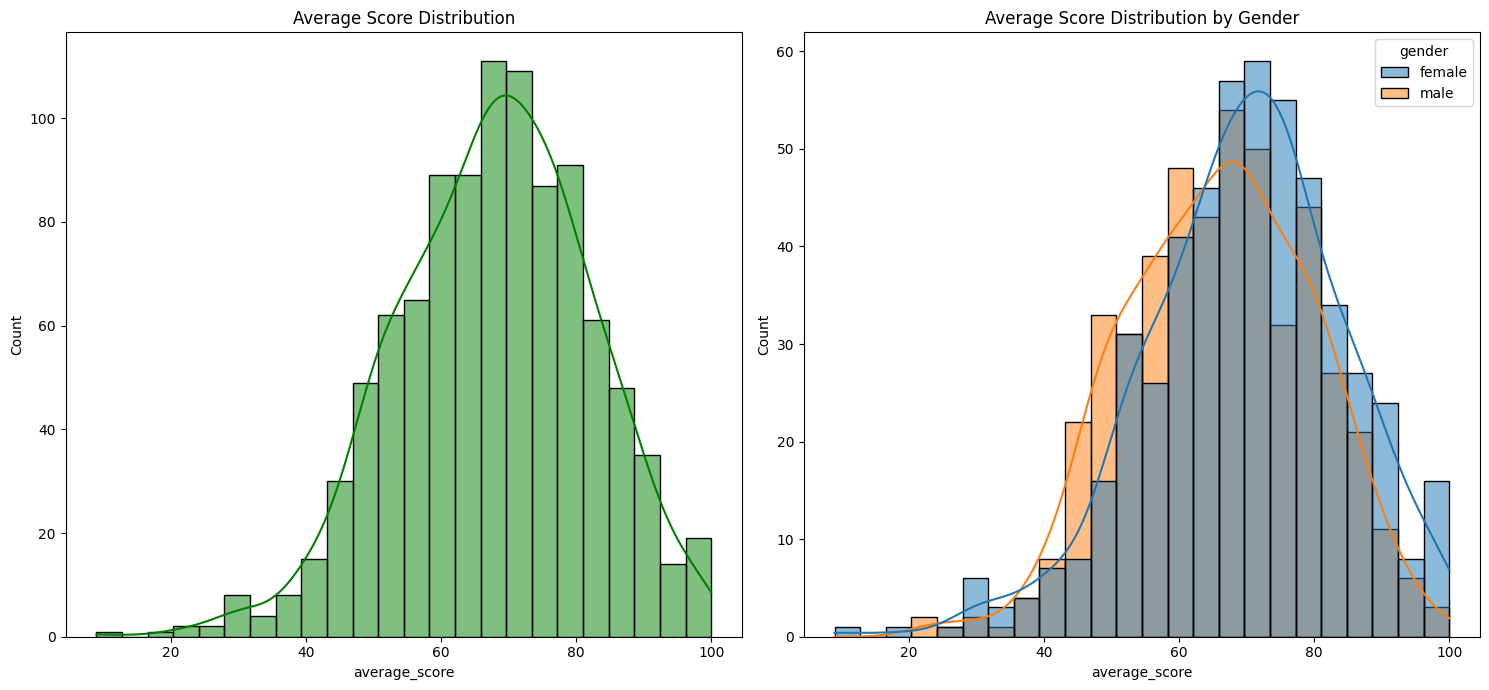

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Average Score Distribution
sns.histplot(df['average_score'], kde=True, color='green', ax=axs[0])
axs[0].set_title('Average Score Distribution')

# Plot 2: Average Score Distribution by Gender
sns.histplot(data=df, x='average_score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Average Score Distribution by Gender')

plt.tight_layout()
plt.show()


##### Female Students tends to perform well then male students

Text(0.5, 1.0, 'Average Score Distribution for males by Lunch')

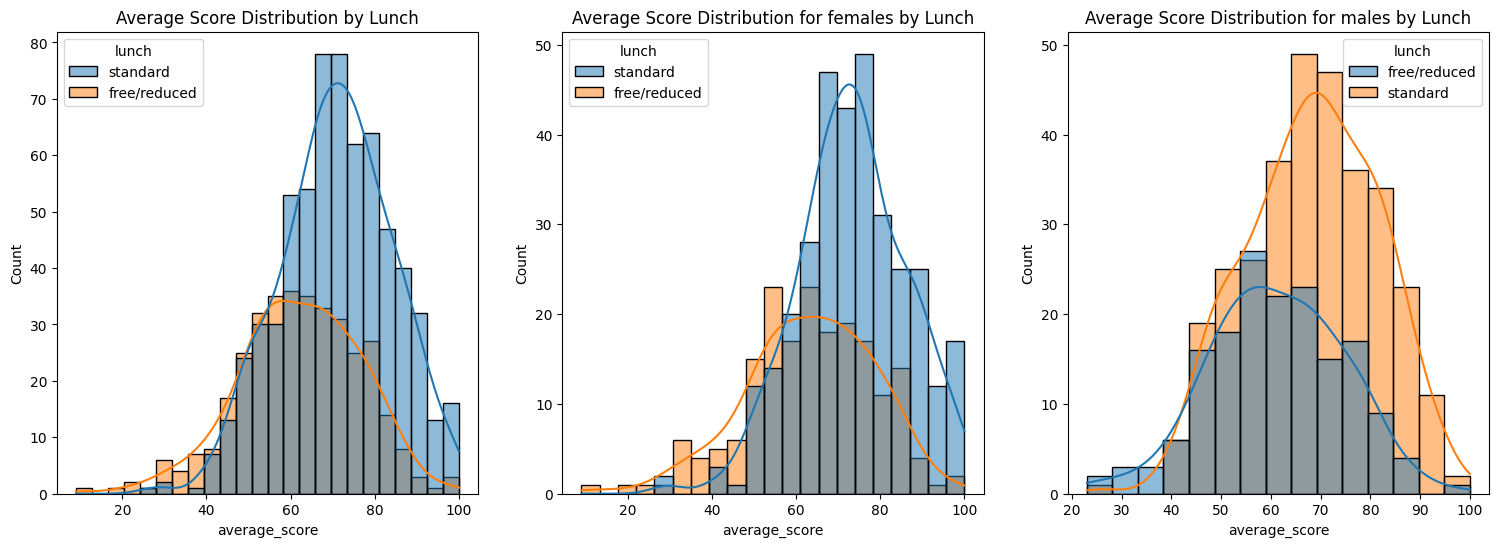

In [50]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.title('Average Score Distribution by Lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='lunch')
plt.title('Average Score Distribution for females by Lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'] , x='average_score', kde=True, hue='lunch')
plt.title('Average Score Distribution for males by Lunch')  
